<a href="https://colab.research.google.com/github/enoc494/ProyectoCircuitos-ANN/blob/master/Borrador_Proyecto_Circuitos_RNAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto, borrador


# Parte I: Preprocesado y carga

In [1]:
# Bloque de imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from PIL import Image,ImageOps #Libreria de imagenes
import os
from shutil import rmtree #Para limpieza de datos
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle #porque sino vamos a meter en orden las cosas***
import tensorflow as tf

#Para descargar los archivos:
from google.colab import files


#Para tensorboard:
%load_ext tensorboard
import datetime

In [2]:
#Obtención de información desde Git
! git clone https://github.com/enoc494/ProyectoCircuitos-ANN.git

Cloning into 'ProyectoCircuitos-ANN'...
remote: Enumerating objects: 1576, done.
remote: Counting objects: 100% (1576/1576), done.
remote: Compressing objects: 100% (1458/1458), done.
remote: Total 1576 (delta 137), reused 1538 (delta 115), pack-reused 0
Receiving objects: 100% (1576/1576), 86.04 MiB | 41.15 MiB/s, done.
Resolving deltas: 100% (137/137), done.


In [3]:
%ls

ProyectoCircuitos-ANN/  sample_data/


In [4]:
%cd ProyectoCircuitos-ANN/

/content/ProyectoCircuitos-ANN


In [5]:
%ls

Borrador_Proyecto_Circuitos_RNAA.ipynb  Data0/  Data0.rar  Log.txt  README.md


In [6]:
!cd /content/ProyectoCircuitos-ANN

In [7]:
os.getcwd()

'/content/ProyectoCircuitos-ANN'

In [8]:
#paths declarados de utilidad 
dir = "/content/ProyectoCircuitos-ANN/"
dirData = dir+'/Data0'



In [9]:
dir

'/content/ProyectoCircuitos-ANN/'

In [10]:
os.listdir()

['README.md',
 'Data0',
 '.git',
 'Borrador_Proyecto_Circuitos_RNAA.ipynb',
 'Log.txt',
 'Data0.rar']

In [11]:
#listado de Tipos de entradas
os.chdir(dirData)
listaDeEntradas = os.listdir()

In [12]:
listaDeEntradas

['Esquematico', 'Componentes']

In [13]:
# Ejemplo de un preprocesado:
os.chdir(dirData+'/'+listaDeEntradas[1])
listaDeDispositivosComponentes = os.listdir()

os.chdir(dirData+'/'+listaDeEntradas[0])
listaDeDispositivosEsquematicos = os.listdir()

os.chdir(dirData+'/'+listaDeEntradas[0]+'/'+listaDeDispositivosEsquematicos[0])
imagenes = os.listdir()

In [14]:
listaDeDispositivosEsquematicos

['PushButton', 'DipSwitchs']

In [15]:
listaDeDispositivosComponentes


['PushButton', 'DipSwitchs']

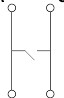

In [16]:
imagen = Image.open(imagenes[0])
imagen

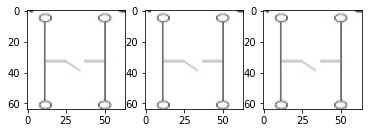

In [17]:
imagen  = imagen.resize((64,64))  #Escalar, 64 x 64 en ejemplo

#Antes del resize realizar un fill de blanco :D

 #Ilustración de las 3 capas a usar
imagen2 = np.array(imagen)
imagen2.shape
imagen2=imagen2.transpose( 2,0,1 )

fig1 = plt.figure(figsize=(6,10))
ax   = fig1.add_subplot(1,3,1)
ax.imshow(imagen2[0],cmap='gray')
ax   = fig1.add_subplot(1,3,2)
ax.imshow(imagen2[1],cmap='gray')
ax   = fig1.add_subplot(1,3,3)
ax.imshow(imagen2[2],cmap='gray')

In [20]:
#Limpieza del directorio por si hubo algo antes de preprocesar:
try:
  rmtree( dir +'DataPrep')
except FileNotFoundError:
  print('nada que borrar')

nada que borrar


#### Función de Carga, Preprocesado y Guardado de Datos


In [21]:
#función para preprocesar datos:
def PreprocesarDatos(resize,tipo,dispositivos):
  """
  el tamaño deseado,
  tipo ingresado
  la lista de dispositivos a revisar (la lista de las clases es diferente!!!)
  """

  #Este proceso se debe repetir para cada tipo

  os.chdir(dir) # Carpeta superior 
  #Preparamos sitios de almacenamiento

  try:
    os.chdir( dir+'DataPrep/')  
  except FileNotFoundError:
    os.mkdir( dir+'DataPrep/')
    os.chdir( dir+'DataPrep/')
  
  try:
    os.chdir( dir+'DataPrep/'+tipo)  
  except FileNotFoundError:
    os.mkdir( dir+'DataPrep/'+tipo)
    os.chdir( dir+'DataPrep/'+tipo)
  
  for dispositivo in dispositivos:
    #Por cada tipo realizaremos el número de carpeta correspondiente
    try:
      os.chdir( dir+'DataPrep/'+tipo+'/'+dispositivo)  
    except FileNotFoundError:
      os.mkdir( dir+'DataPrep/'+tipo+'/'+dispositivo)
      os.chdir( dir+'DataPrep/'+tipo+'/'+dispositivo)
    #Con la carpeta destino creada nos movemos a la ubicación de las imagenes

    os.chdir(dir+'Data0/'+tipo+'/'+dispositivo) #Se supone existe
    print('Actualmente en: ',tipo+', '+dispositivo)
    
    imagenes = os.listdir()
  
    #Acumuladores de datos procesados
    x_v=[]
    y_v=[]
    for imagenName in imagenes:
  
      imagen  = Image.open(imagenName)
      imagen = imagen.convert('RGB') #Todo a RGB

      #RELLENAR DE BLANCO!!! si no es cuadrada :v 

      imagen  = imagen.resize((resize,resize))  #Escalar

      imagen = np.array(imagen)
      imagen = imagen/255 #Normalizado
    
      #Revisar que todas las imagenes cumplan*
      x_v.append(imagen)

    y_v.append(dispositivo)
    y_v=y_v*len(x_v) #Número de veces que se debe repetir el target
    x_v=np.array(x_v)
    y_v=np.array(y_v)
  
    #Esto se puede hacer con un with
    os.chdir(dir +'DataPrep/'+tipo+'/'+dispositivo) 
    pickle.dump(x_v, open(dispositivo+"Data", 'wb'))
    pickle.dump(y_v, open(dispositivo+"Target", 'wb'))
    #Regresamos al directorio donde se encuentran el resto, mejorar con with




In [22]:
#Implementación de la función anterior
PreprocesarDatos(32,listaDeEntradas[0],listaDeDispositivosEsquematicos) #Preprocesa Esquematicos
PreprocesarDatos(32,listaDeEntradas[1],listaDeDispositivosComponentes)  #Preprocesa Componentes


Actualmente en:  Esquematico, PushButton
Actualmente en:  Esquematico, DipSwitchs
Actualmente en:  Componentes, PushButton
Actualmente en:  Componentes, DipSwitchs


In [23]:
dir+'/DataPrep'

'/content/ProyectoCircuitos-ANN//DataPrep'

In [24]:
path=os.getcwd()

In [26]:
!zip -r file.zip /content/ProyectoCircuitos-ANN/DataPrep 

updating: content/ProyectoCircuitos-ANN/DataPrep/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematico/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematico/PushButton/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematico/PushButton/PushButtonData (deflated 94%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematico/PushButton/PushButtonTarget (deflated 64%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematico/DipSwitchs/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematico/DipSwitchs/DipSwitchsTarget (deflated 59%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematico/DipSwitchs/DipSwitchsData (deflated 95%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Componentes/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Componentes/PushButton/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Componentes/PushButton/PushButtonData (deflated 86%)
updating: content/Pro

In [27]:
#Descarga del FOLDER con modificaciones
files.download("file.zip") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Función de Carga de datos Preprocesados

In [28]:
def CargadorDatos(dirOrigen, n,personajes):
  #Se elige directorio origen y número de personajes
  x_v =[]
  y_v =[]
  i = 0 #indice de personaje
  t = 0 #total de personajes agregados
  while t < n:
  
    personaje = personajes[i]
    os.chdir(dirOrigen+'/'+personaje)

    #cargar todo  con 64x64 

    #LOAD 
    data = pickle.load(open(personaje+'Data','rb')) 
    
    #If a implementar para regular que personajes pueden ser cargados
    # 0 -> todos serán considerados
    # 
    if(len(data)>0):    
      t=t+1
      x_v.extend( data )
      y_v.extend( pickle.load( open(personaje+'Target','rb'))  )
    i=i+1 
  return np.array(x_v) , np.array(y_v)

In [29]:
#implementación de la función anterior


In [30]:
#Forma de los datos